In [1]:
TEST_PATH = "/Users/h1de0us/uni/mer-eeg-analysis/data/deap_filtered/s01.dat"

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# delta, theta, alpha, beta, gamma
bands_min = [0.5, 4, 8, 12, 30]
bands_max = [4, 8, 12, 30, 45]

In [4]:
import pickle

x = pickle.load(open(TEST_PATH, "rb"), encoding="latin1")
data_user1 = x["data"]
labels_user1 = x["labels"]
data_user1.shape, labels_user1.shape

((40, 40, 8064), (40, 4))

In [5]:
from src.graph import EEGConnectivityGraph


In [43]:
graph = EEGConnectivityGraph(TEST_PATH)

Data shape: (n_trials, n_channels, n_samples): 40 40 8064


### PLV computation

In [60]:
con_plv = graph.compute_connectivity(method='plv', fmin=bands_min, fmax=bands_max)

In [61]:
con_plv.get_data().shape

(1024, 5)

In [62]:
print(con_plv.get_data(output="dense").shape) # (n_channels, n_channels, n_bands)

(32, 32, 5)


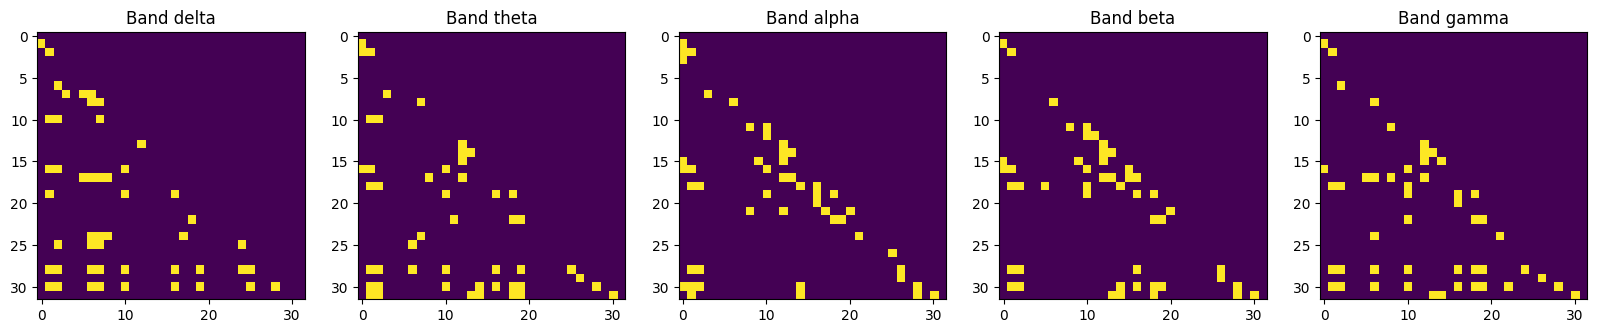

In [63]:
from src.plot import plot_connectivity_maps, plot_graphs

con_data = con_plv.get_data(output="dense")
plot_connectivity_maps(con_data, n_connections=50)

In [64]:
channel_names = {i: channel for i, channel in enumerate(graph.channels)}

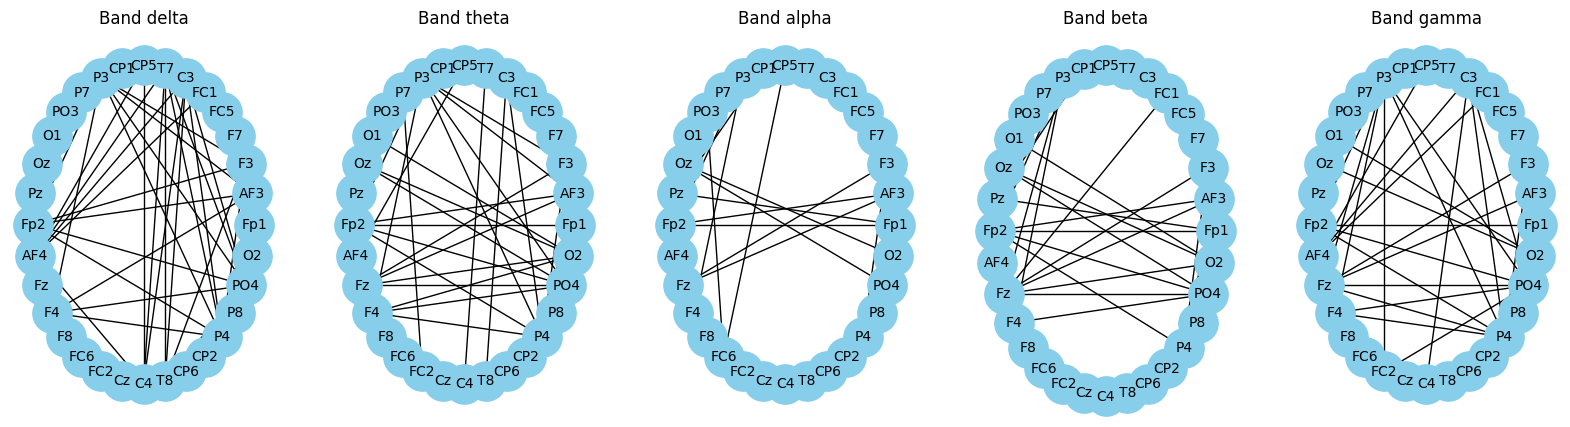

In [65]:
plot_graphs(con_data, n_connections=50, channel_names=channel_names)

### PLI computation

In [66]:
con_pli = graph.compute_connectivity(method='pli', fmin=bands_min, fmax=bands_max)

In [67]:
con_pli

<SpectralConnectivity | freq : [2.253968, 37.500000], , nave : 40, nodes, n_estimated : 32, 1024, ~296 kB>

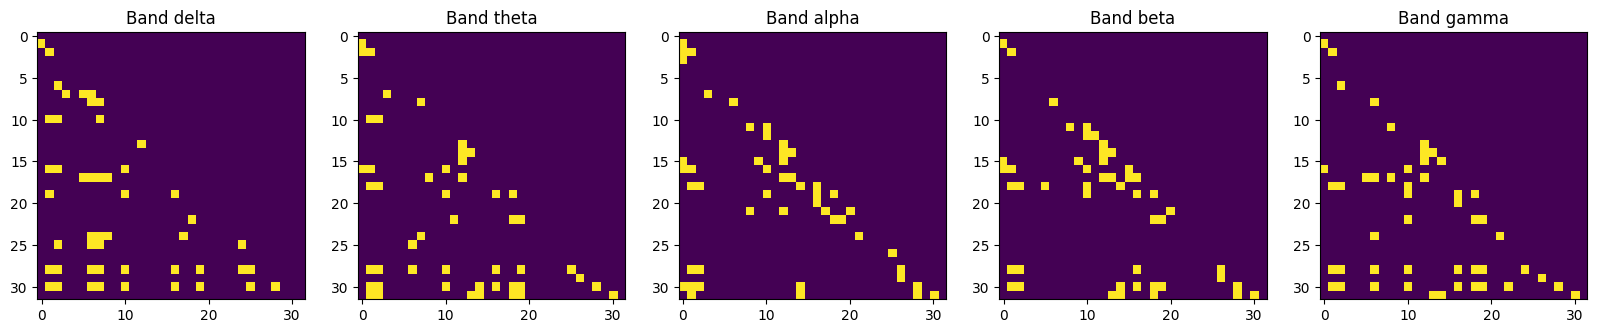

In [68]:
from src.plot import plot_connectivity_maps, plot_graphs

con_data = con_pli.get_data(output="dense")
plot_connectivity_maps(con_data, n_connections=50)

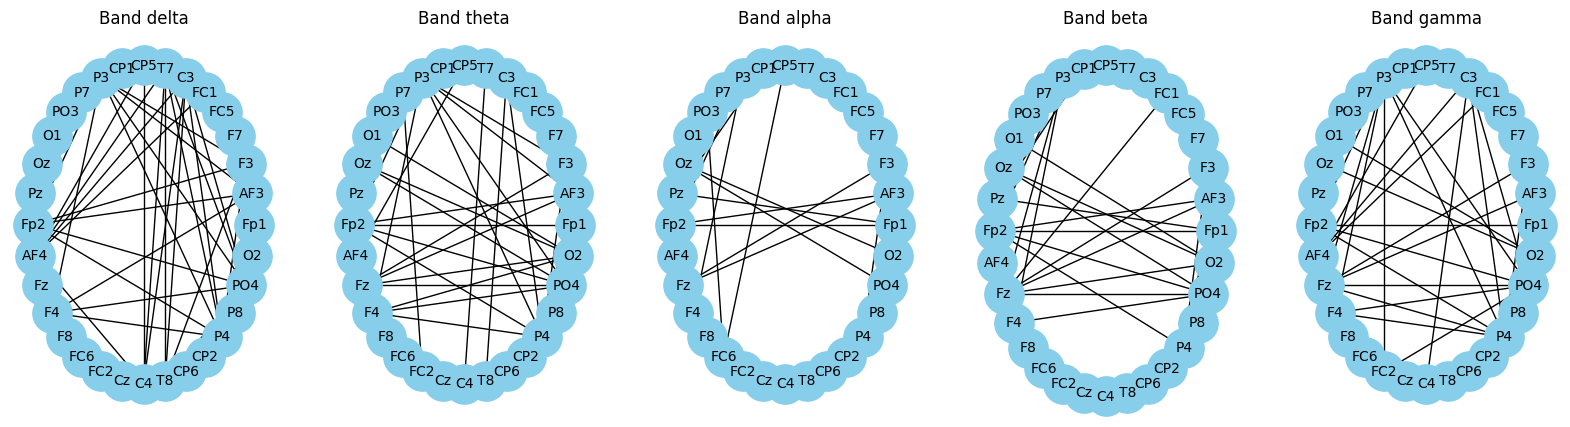

In [69]:
plot_graphs(con_data, n_connections=50, channel_names=channel_names)

In [70]:
import numpy as np

np.isclose(con_pli.get_data(output="dense"), con_plv.get_data(output="dense")).all() # wtf

True